In [1]:
import numpy as np
import networkx as nx
import cv2
from matplotlib import pyplot as plt

In [2]:

def array_to_graph(arr):
    # Create a graph
    G = nx.Graph()
    
    rows, cols = arr.shape
    
    # Add nodes
    for i in range(rows):
        for j in range(cols):
            if arr[i, j] == 1:
                G.add_node((i, j))
    
    # Add edges
    for i in range(rows):
        for j in range(cols):
            if arr[i, j] == 1:
                # Check right neighbor
                if j + 1 < cols and arr[i, j+1] == 1:
                    G.add_edge((i, j), (i, j+1), weight=1)
                
                # Check bottom neighbor
                if i + 1 < rows and arr[i+1, j] == 1:
                    G.add_edge((i, j), (i+1, j), weight=1)
    
    return G

In [7]:
def resize_image(image, dims):
    print(dims)
    if not isinstance(image, np.ndarray):
        raise ValueError("Input must be a numpy array")
    
    
    resized_image = cv2.resize(image, (dims[0], dims[1]), interpolation=cv2.INTER_AREA)
    
    # Convert the resized image to grayscale if it's not already
    if len(resized_image.shape) == 3:
        grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_image = resized_image
    
    # Normalize the array to have values between 0 and 1
    normalized_array = grayscale_image.astype(np.float32) / 255.0
    
    return normalized_array

In [10]:
fire = cv2.imread("images/21548917.png")
fire = resize_image(fire, (25, 25))
# bw, _, _ = cv2.split(fire)

mask = np.asarray(bw == 255)
maskII = np.asarray([[_el if _el != 255 else 1 for _el in _ar] for _ar in bw])


graph = array_to_graph(maskII)
tree = nx.minimum_spanning_tree(graph)

(25, 25)


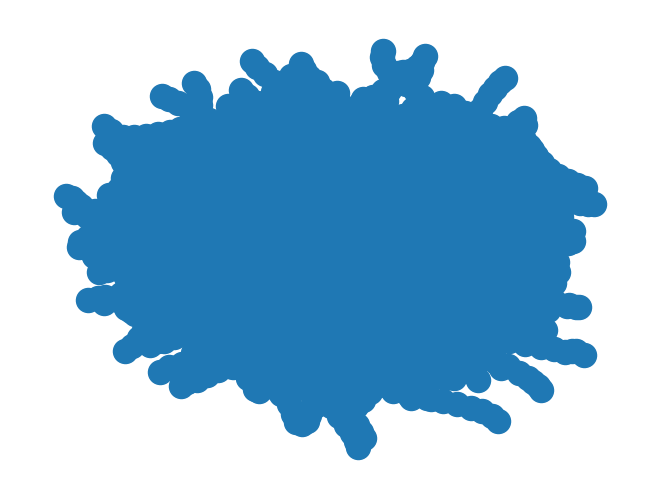

In [ ]:
# Example usage
arr = np.array([
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

graph = array_to_graph(arr)

# Print some information about the graph
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")
print("Edges:", list(graph.edges(data=True)))